In [1]:
##################################################
## Author: Sai Akhil Suggu
## Credits: CSE250A, fall 2019, Prof. Lawrence Saul
## Version: 1.0.1
## Mmaintainer: Sai Akhil Suggu
## Email: saiakhil0034@eng.ucsd.edu
## Status: Done
##################################################

In [83]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import random
from decimal import *

## 3.6 b)

Given n = 10, $\alpha$ = 0.1  with
$$
P(Z | B1,B2,...,Bn) = \frac{1-\alpha}{1+\alpha} \alpha^{|Z- f(B)|}
$$

and 
$$ f(B) = \sum_{i=1}^{n} {2}^{i-1}Bi $$

And all prior probabilities, P(Bi=1)= 0.5

Lets fix Z = 128 and sample B1,B2,....,Bn with their prior probabilities

In [21]:
## To be able to reproduce values later
random.seed(90001)

In [22]:
# Funtion to generate event with probability = prob
def event_generator(prob):
    return 0 if (random.random() >= prob) else 1

#function test
abs((sum([event_generator(0.2) for i in range(100000)])/100000.0) -0.2) < 0.01

True

In [59]:
# function to calculate decimal number of binary digits
def binary_2_decimal(binary):
    decimal = 0
    for i,j in enumerate(binary):
        decimal += j<<i
    return decimal

#function test
print(binary_2_decimal(np.array([0,1,0,1])) == 10) #note the order of digits, here we are order B1,B2,B3, hence this value

True


In [ ]:
# function to calculate probability of z given decimal number from all b's
def z_prob_given_parents(alpha,decimal,z):
    return Decimal(1-alpha) * (Decimal(alpha)**(abs(decimal-z)))/Decimal(1+alpha)

#function test
print(z_prob_given_parents(0.5,128,128) == Decimal(1.0)/3)
print(z_prob_given_parents(0,12,128) == 0)

In [95]:
#For calculating P (Bi = 1|Z = 128) for i ∈ {2, 5, 8, 10}

Estimating required probability using
$$
 P (Bi = 1|Z = 128) = \frac{\sum_{t = 1}^{num_samples} I(1, Bit) P(Z = 128 | B1t,B2t, .....,Bnt)}
{\sum_{t = 1}^{num_samples}  P(Z = 128 | B1t,B2t, .....,Bnt)}
$$

In [178]:
#given values
n = 10 
alpha = 0.1
prior_prob = 0.5 # given it is same for all Bs, hence using only one variable
Z = 128

In [179]:
# Create samples
num_smpls = 10000000

for large number of samples, lets use numpy random generator to generate array of n rows and number of columns and number of samples to make the process quick. We are also helped by giving prioir probabilities as 0.5 for all

In [180]:
b_samples_arr = (np.random.rand(n,num_smpls) <prior_prob).astype(int)
dec_arr = np.apply_along_axis(binary_2_decimal, 0, b_samples_arr)
#print(dec_arr)
z_prob_arr = np.array([z_prob_given_parents(alpha,x,Z) for x in dec_arr])
which_B = [2,5,8,10]
for i in which_B:
    req_prob = z_prob_arr[b_samples_arr[(i-1)].astype(bool)].sum()/z_prob_arr.sum()
    print( f'i : {i} and req probability = {req_prob}')

i : 2 and req probability = 0.09889701849292264540733222806
i : 5 and req probability = 0.09082855201014359891793930041
i : 8 and req probability = 0.9091714479898564828572178795
i : 10 and req probability = 9.187384846690513150818013598E-385


## 3.6 c)

In [181]:
# Writing above calculation into function so that we can use it for multiple values of number of samples
# instead of calculating probabilities ( Z giveb B1, B2, ..., Bn ) each and every time 
# lets just calculate these one time and using number of samples to use slice of that array of samples 

TOTAL_NUM_SMPLS = 10000000
B_SAMPLES_ARR = (np.random.rand(n,TOTAL_NUM_SMPLS) <prior_prob).astype(int)
DECIMAL_ARR = np.apply_along_axis(binary_2_decimal, 0, B_SAMPLES_ARR)
Z_PROB_ARR = np.array([z_prob_given_parents(alpha,x,Z) for x in DECIMAL_ARR])

In [183]:
# Calculating cummulative sums for faster calculation for several values for number of samples

cum_sum_arr_Z = np.cumsum(Z_PROB_ARR)
cum_sum_arr_B2 = np.cumsum(np.where(B_SAMPLES_ARR[1].astype(bool), Z_PROB_ARR, 0))
cum_sum_arr_B5 = np.cumsum(np.where(B_SAMPLES_ARR[4].astype(bool), Z_PROB_ARR, 0))
cum_sum_arr_B8 = np.cumsum(np.where(B_SAMPLES_ARR[7].astype(bool), Z_PROB_ARR, 0))
cum_sum_arr_B10 = np.cumsum(np.where(B_SAMPLES_ARR[9].astype(bool), Z_PROB_ARR, 0))

In [195]:
def calculate_inference(num_smpls):
    return np.array([cum_sum_arr_B2[num_smpls-1]/cum_sum_arr_Z[num_smpls-1],
                     cum_sum_arr_B5[num_smpls-1]/cum_sum_arr_Z[num_smpls-1],
                    cum_sum_arr_B8[num_smpls-1]/cum_sum_arr_Z[num_smpls-1],
                     cum_sum_arr_B10[num_smpls-1]/cum_sum_arr_Z[num_smpls-1]])

In [196]:
%time calculate_inference(10000000)

CPU times: user 36 µs, sys: 1e+03 ns, total: 37 µs
Wall time: 40.1 µs


array([Decimal('0.09873588137656769988907040430'),
       Decimal('0.09079147987436121222694855646'),
       Decimal('0.9092085201256388696016720834'),
       Decimal('9.156929935409161743215620875E-385')], dtype=object)

In [198]:
#Note above values are different from answer in 3.6b) but they are very close. This difference is due to using random number generator again

In [205]:
x = list(range(1,1000,100)) + list(range(1000,10000000))#np.logspace(0.0, 7.0, num=1000).astype(int)
y = [calculate_inference(i) for i in x]

**Plots with x-axis in log scale**

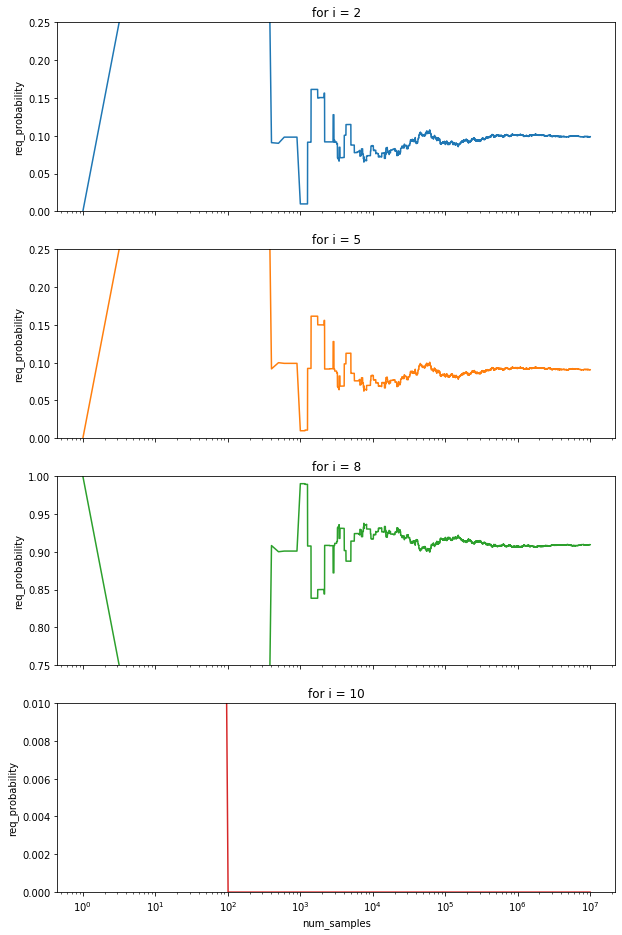

In [209]:
fig, ax = plt.subplots(4, figsize=(10,16))

ax[0].plot(x, [i[0] for i in y])
ax[0].set_xscale('log')
ax[0].set_ylim(0,0.25)
ax[0].set_title('for i = 2' )
ax[1].plot(x, [i[1] for i in y], 'tab:orange')
ax[1].set_xscale('log')
ax[1].set_ylim(0,0.25)
ax[1].set_title('for i = 5' )
ax[2].plot(x, [i[2] for i in y], 'tab:green')
ax[2].set_xscale('log')
ax[2].set_ylim(0.75,1)
ax[2].set_title('for i = 8' )
ax[3].plot(x, [i[3] for i in y], 'tab:red')
ax[3].set_xscale('log')
ax[3].set_ylim(0,0.01)
ax[3].set_title('for i = 10' )

for ax in fig.get_axes():
    ax.set(xlabel='num_samples', ylabel='req_probability')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in fig.get_axes():
    ax.label_outer()

In [207]:
# Observe that estimates have converged to non changing two significant digits (good degree of precision)
# variation in intial part of the graph is due to random sampling initialization. 
# Thus when we have less samples, we can get very random values for answers

In [243]:
Z_PROB_ARR[-10:]

array([Decimal('8.181818181818571956057909611E-861'),
       Decimal('8.181818181818507462193115474E-719'),
       Decimal('8.181818181818447055967639272E-586'),
       Decimal('8.181818181818512004014579853E-729'),
       Decimal('8.181818181818390283199334578E-461'),
       Decimal('8.181818181818300355134339941E-263'),
       Decimal('8.181818181818267654019796433E-191'),
       Decimal('8.181818181818541071671951853E-793'),
       Decimal('8.181818181818523812750387224E-755'),
       Decimal('8.181818181818192259783487795E-25')], dtype=object)

In [242]:
cum_sum_arr_Z[-10:]

array([Decimal('9775.303748480403196862115042'),
       Decimal('9775.303748480403196862115042'),
       Decimal('9775.303748480403196862115042'),
       Decimal('9775.303748480403196862115042'),
       Decimal('9775.303748480403196862115042'),
       Decimal('9775.303748480403196862115042'),
       Decimal('9775.303748480403196862115042'),
       Decimal('9775.303748480403196862115042'),
       Decimal('9775.303748480403196862115042'),
       Decimal('9775.303748480403196862115043')], dtype=object)

In [244]:
last_few_samples = copy.deepcopy(y[-10:])
for (i,j) in enumerate([2,5,8,10]):
    print(f" for i = {j}, last few values :")
    [print(k[i]) for k in last_few_samples]

 for i = 2, last few values :
0.09873588137656769988907040431
0.09873588137656769988907040431
0.09873588137656769988907040431
0.09873588137656769988907040431
0.09873588137656769988907040431
0.09873588137656769988907040431
0.09873588137656769988907040431
0.09873588137656769988907040431
0.09873588137656769988907040431
0.09873588137656769988907040431
 for i = 5, last few values :
0.09079147987436121222694855647
0.09079147987436121222694855647
0.09079147987436121222694855647
0.09079147987436121222694855647
0.09079147987436121222694855647
0.09079147987436121222694855647
0.09079147987436121222694855647
0.09079147987436121222694855647
0.09079147987436121222694855647
0.09079147987436121222694855647
 for i = 8, last few values :
0.9092085201256388696016720835
0.9092085201256388696016720835
0.9092085201256388696016720835
0.9092085201256388696016720835
0.9092085201256388696016720835
0.9092085201256388696016720835
0.9092085201256388696016720835
0.9092085201256388696016720835
0.90920852012563886960

In [245]:
# Note that here all the last values look same Z_PROB_ARR varies very small which leads to change in numerrator and denomitor being very small. Thus all the values look same

**Plots with x-axis in normal scale**

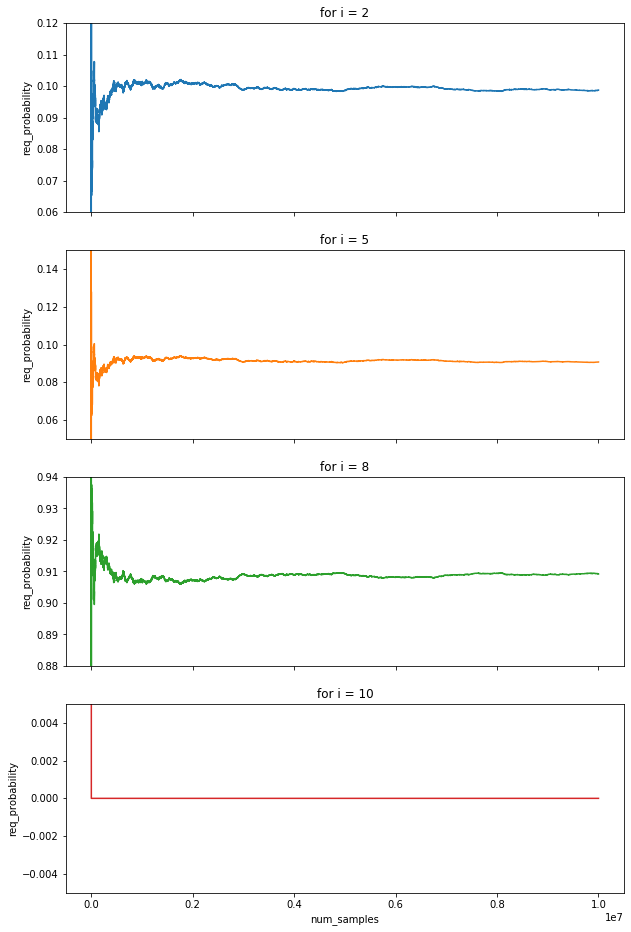

In [213]:
fig, ax = plt.subplots(4, figsize=(10,16))

ax[0].plot(x, [i[0] for i in y])
ax[0].set_ylim(0.06,0.12)
ax[0].set_title('for i = 2' )
ax[1].plot(x, [i[1] for i in y], 'tab:orange')
ax[1].set_ylim(0.05,0.15)
ax[1].set_title('for i = 5' )
ax[2].plot(x, [i[2] for i in y], 'tab:green')
ax[2].set_ylim(0.88,0.94)
ax[2].set_title('for i = 8' )
ax[3].plot(x, [i[3] for i in y], 'tab:red')
ax[3].set_ylim(-0.005,0.005)
ax[3].set_title('for i = 10' )

for ax in fig.get_axes():
    ax.set(xlabel='num_samples', ylabel='req_probability')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in fig.get_axes():
    ax.label_outer()